# Graficación

Una de las tareas fundamentales del cómputo científico es el manejar datos de todo tipo: leerlos de un archivo, o crearlos en una simulación; escribirlos a un archivo; visualizarlos, para extraer su mensaje; etc.

En este notebook veremos las herramientas básicas para graficar.



## Vectores = Arreglos 1D

En una computadora, la graficación debe ser discreta; es decir, debemos evaluar una función en un conjunto finito de puntos. Para hacer esto vamos a usar un nuevo tipo de variable llamada `Array`.

Un arreglo uni-dimensional es un vector, o una lista, o una secuencia, o un conjunto (ordenado) de datos. Se puede visualizar como una pichonera con cajas consecutivas, en las cuales se pueden guardar datos.

## Construcción por extensión

In [12]:
[1,3,4]

3-element Array{Int64,1}:
 1
 3
 4

In [5]:
f(x) = x.^2

f (generic function with 1 method)

In [6]:
f([1,23,4])

3-element Array{Int64,1}:
   1
 529
  16

## Construcción por comprensión

Julia tiene una sintaxis poderosa para crear arreglos: arreglos por comprensión (o "secuenciación"), que corresponde a la notación matemática bonita para especifar conjuntos. Por ejemplo, el conjunto de los cuadrados de los primeros diez enteros se escribe como sigue. Si notamos por $A := \{ 1, 2, \ldots, 10 \}$ los números de 1 a 10, entonces el conjunto $C$ de sus cuadrados es

$$C := \{ x^2 : x \in A \}$$

En Julia, ¡podemos escribir algo similar!


In [8]:
xes=[i for i in 1:100]

100-element Array{Int64,1}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
  89
  90
  91
  92
  93
  94
  95
  96
  97
  98
  99
 100

In [9]:
f(xes)

100-element Array{Int64,1}:
     1
     4
     9
    16
    25
    36
    49
    64
    81
   100
   121
   144
   169
     ⋮
  7921
  8100
  8281
  8464
  8649
  8836
  9025
  9216
  9409
  9604
  9801
 10000

Recuerda que "for" quiere decir "para", e "in" quiere decir "en". En Julia, los corchetes (\[ y \]) construyen arreglos. Por lo tanto, podemos leer esto como "el arreglo de $i^2$ para $i$ en el conjunto `1:100`", o "la colección \[ordenada\] de los cuadrados de los elementos de A".

In [1]:
cuadrados=[i*i for i in 1:10]

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

Podemos poner un `if` al final de la comprensión para incluir sólo ciertos valores que satisfagan cierta condición, e.g.

Vamos a hacer un arreglo de múltiplos de 3.

In [45]:
[i for i in 1:30 if i%3 == 0]

10-element Array{Int64,1}:
  3
  6
  9
 12
 15
 18
 21
 24
 27
 30

## Ejercicio 

1. Crea una lista de los números de 1 al 100 que sean múltiplos de 3 o 5. \["O" se escribe como `||`.\]


In [4]:
n = 100
A = [i for i in 1:n if (i%3 == 0 || i%5 == 0)]

47-element Array{Int64,1}:
   3
   5
   6
   9
  10
  12
  15
  18
  20
  21
  24
  25
  27
   ⋮
  78
  80
  81
  84
  85
  87
  90
  93
  95
  96
  99
 100

2. Calcule la suma de el arreglo anterior

In [21]:
A[0]

BoundsError: BoundsError: attempt to access 47-element Array{Int64,1} at index [0]

In [23]:
suma = 0
i = 0
while i < 47   #47 es el nbúmero de elementos del arreglo A
    suma += A[i + 1]
    i += 1
end
return suma

2418

In [24]:
sum(A) == suma

true

In [25]:
length(A)

47

In [27]:
suma = 0
i = 1
while i <= length(A)   #47 es el nbúmero de elementos del arreglo A
    suma += A[i]
    i += 1
end
return suma

2418

2. Calcula su suma. ¿Cómo puedes verificar que la suma está bien? (utilice la función `sum()`)

In [28]:
sum(A) == suma

true

## Operaciones con arreglos

Aquí vamos a ver las operaciones básicas y como acceder a los arreglos. Más adelante en el curso ahondaremos en más detalles y funciones de los arreglos.

Veamos que podemos hacer con los arreglos:

**1. Sumar y restar arreglos con arreglos**

In [2]:
cuadrados + cuadrados

10-element Array{Int64,1}:
   2
   8
  18
  32
  50
  72
  98
 128
 162
 200

In [3]:
cuadrados - cuadrados

10-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

**2. Sumar y restar arreglos con números**

In [4]:
cuadrados + 1

MethodError: MethodError: no method matching +(::Array{Int64,1}, ::Int64)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  +(!Matched::Complex{Bool}, ::Real) at complex.jl:292
  +(!Matched::Missing, ::Number) at missing.jl:93
  ...

In [5]:
cuadrados .+ 1

10-element Array{Int64,1}:
   2
   5
  10
  17
  26
  37
  50
  65
  82
 101

Por default, julia no sabe como sumar o restar (`+` o `-`) arreglos con números (¿Cómo sumas escalares con vectores?). 

Si usamos un punto antes del operador: `.+` (`.-`), julia sumará (restará) el escalar a cada elemento del arreglo.

**3. Multiplicar por un escalar**

In [17]:
cuadrados*2

10-element Array{Int64,1}:
   2
   8
  18
  32
  50
  72
  98
 128
 162
 200

In [18]:
cuadrados/3

10-element Array{Float64,1}:
  0.3333333333333333
  1.3333333333333333
  3.0               
  5.333333333333333 
  8.333333333333334 
 12.0               
 16.333333333333332 
 21.333333333333332 
 27.0               
 33.333333333333336 

**3. Elevar a una pontencia**

Para elevar a una potencia un arreglo también debemos agregar un `.`:

In [20]:
cuadrados.^2

10-element Array{Int64,1}:
     1
    16
    81
   256
   625
  1296
  2401
  4096
  6561
 10000

**4. Accediendo a los elementos**

Si queremos acceder al elemento i-ésimo de nuestro arreglo debemos usar la sintáxis:

```julia
A[i]
```
donde `A` es un arreglo de `n` elementos (`n > i`)

In [24]:
cuadrados[5]

25

In [29]:
cuadrados[0]

BoundsError: BoundsError: attempt to access 10-element Array{Int64,1} at index [0]

**Ojo:** A diferencia de otros lenguajes de programación, los elementos de los arreglos se comienzan a enumerar desde el 1.

Si queremos saber cuál es la longitud de un arreglo debemos podemos usar la función `length()`

In [25]:
length(cuadrados)

10

In [33]:
cuadrados[length(cuadrados)]

100

In [35]:
cuadrados[end]

100

# Graficación


Ahora somos capaces de producir datos interesantes, pero rápidamente llegamos a un momento en el cual ya no se pueden apreciar por ser tantos. La mejor solución es la visualización, es decir, graficarlos.

Hay varios paquetes (librerías / bibliotecas) gráficos en Julia: 
* Plots.jl
* PyPlot.jl
* GR.jl


Para utilizar un paquete, es necesario primero instalarlo, es decir, jalar el código del paquete a tu computadora. Esto es necesario hacer una sola vez en cada instalación de Julia:



In [1]:
using Plots
gr()
##Si tienen errores al escribir el codigo de arriba usen:
# 1. Carguen la librería  using Pkg
# Pkg.add("Plots")  
# using Plots

Plots.GRBackend()

Si tienen errores al escribir el código de arriba procendan como sigue:
1. Carguen la librería *Pkg*: `using Pkg`
2. Instalen la librería *Plots.jl*: `Pkg.add("Plots")`
3. Carguen la librería: `using Plots`

In [30]:
gr() ## o pyplot()

Plots.GRBackend()

In [2]:
?plot

search: plot plot! plotly plot3d Plots plot3d! plotlyjs plotattr plotarea



The main plot command. Use `plot` to create a new plot object, and `plot!` to add to an existing one:

```
    plot(args...; kw...)                  # creates a new plot window, and sets it to be the current
    plot!(args...; kw...)                 # adds to the `current`
    plot!(plotobj, args...; kw...)        # adds to the plot `plotobj`
```

There are lots of ways to pass in data, and lots of keyword arguments... just try it and it will likely work as expected. When you pass in matrices, it splits by columns. To see the list of available attributes, use the `plotattr([attr])` function, where `attr` is the symbol `:Series:`, `:Subplot:`, `:Plot` or `:Axis`. Pass any attribute to `plotattr` as a String to look up its docstring; e.g. `plotattr("seriestype")`.


┌ Warning: Skipped marker arg crox.
└ @ Plots /home/mvb/.julia/packages/Plots/QYETN/src/args.jl:745


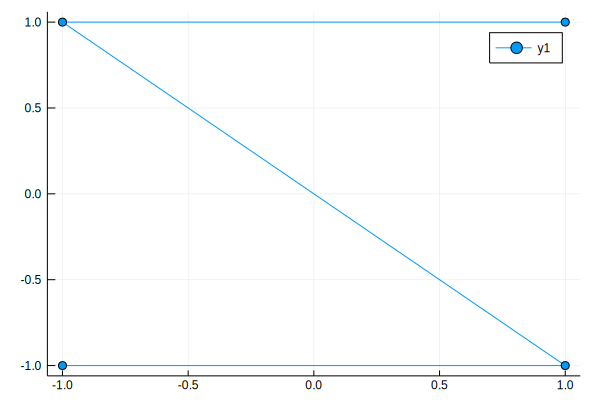

In [6]:
xes=[1,-1,1,-1]
yes=[1,1,-1,-1]
plot(xes,yes,m=:crox)

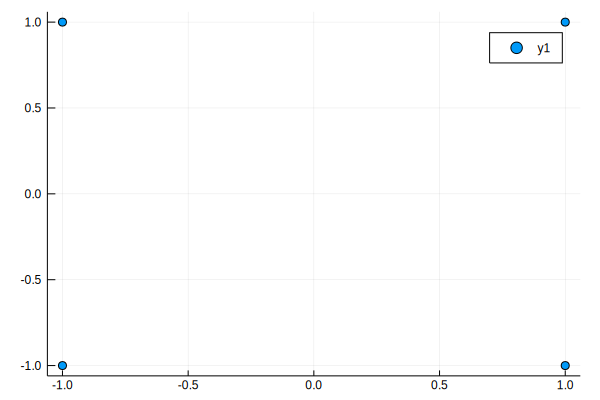

In [4]:
scatter(xes,yes)

## Ejercicio

1. Define un paso $\delta x$ chico, y crea un arreglo xx con números igualmente espaciados de -3 a 3. \[Pista: agrega otros ":$\delta x$:" al rango.\]


In [7]:
δx = 1e-1
xx = [i for i in -3:δx:3]

61-element Array{Float64,1}:
 -3.0
 -2.9
 -2.8
 -2.7
 -2.6
 -2.5
 -2.4
 -2.3
 -2.2
 -2.1
 -2.0
 -1.9
 -1.8
  ⋮  
  1.9
  2.0
  2.1
  2.2
  2.3
  2.4
  2.5
  2.6
  2.7
  2.8
  2.9
  3.0

2. Define una función $f$ que acepta $x$ y calcula $3x^2 - 2$. Utiliza $f$ para crear un arreglo yy de los resultados de evaluar $f$ para cada elemento del arreglo $xx$.


In [9]:
f(x) = 3x .^ 2 .- 2
yy = f(xx)

61-element Array{Float64,1}:
 25.0              
 23.23             
 21.519999999999996
 19.870000000000005
 18.28             
 16.75             
 15.280000000000001
 13.869999999999997
 12.520000000000003
 11.23             
 10.0              
  8.83             
  7.720000000000001
  ⋮                
  8.83             
 10.0              
 11.23             
 12.520000000000003
 13.869999999999997
 15.280000000000001
 16.75             
 18.28             
 19.870000000000005
 21.519999999999996
 23.23             
 25.0              

3. Utiliza la función `plot()` de *Plots* para graficar la función `f()`. `plot()` acepta dos argumentos, un arreglo con las coordenadas $x$ y otro con las coordenadas $y$.

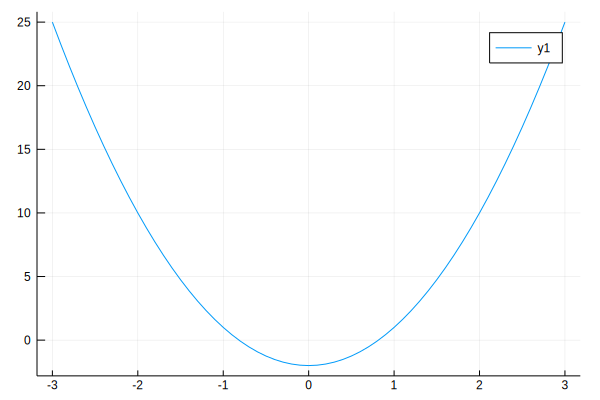

In [10]:
plot(xx, yy)

4. Utiliza la ayuda de la función [?plot o help(plot)] y en la documentación del paquete u otro lado para cambiar el estilo de la gráfica para utilizar líneas rojas y puntos verdes.

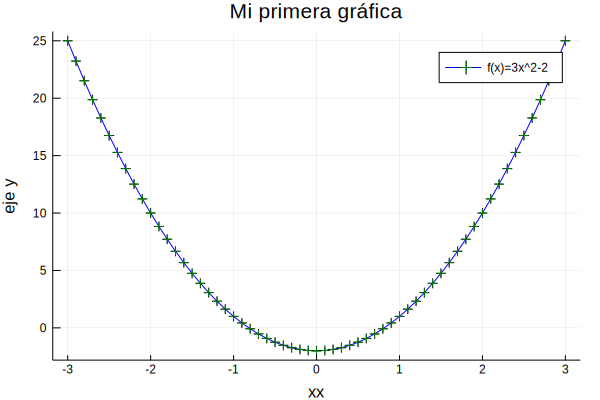

In [13]:
xx = [i for i in -3:δx:3]
yy =f(xx)
plot(xx, yy, color=:blue, m=:cross,markercolor=:green,label="f(x)=3x^2-2"
    ,xlabel="xx", ylabel="eje y",title="Mi primera gráfica")

5. Busca cómo agregar etiquetas a los ejes (lo cual debe hacerse en cualquier gráfica) y un título global, así como una leyenda.

## Ejercicio 

Grafiquen un semicírculo de radio $R=2$, en el segundo y primer cuadrante del plano cartesiano.

$$x^2 +y^2 = R^2$$
$$ y=f(x)$$

In [14]:
y_circulo(x,R=2)= (R^2 .- x.^2).^(1/2)

y_circulo (generic function with 2 methods)

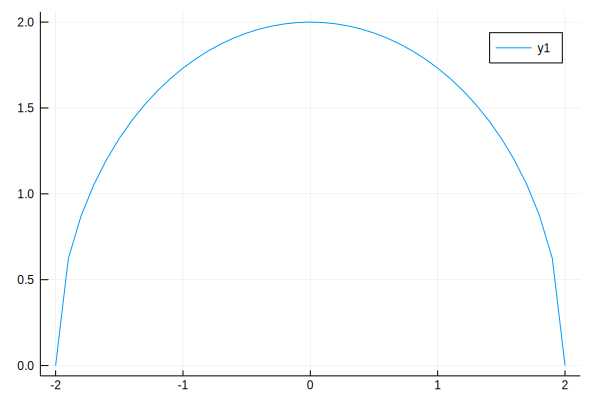

In [15]:
xx = [i for i in -2:δx:2]
yy =y_circulo(xx)
plot(xx, yy)

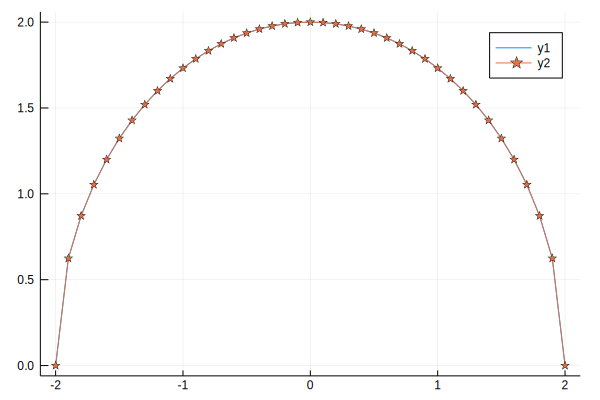

In [16]:
plot!(xx, yy, m=:star)

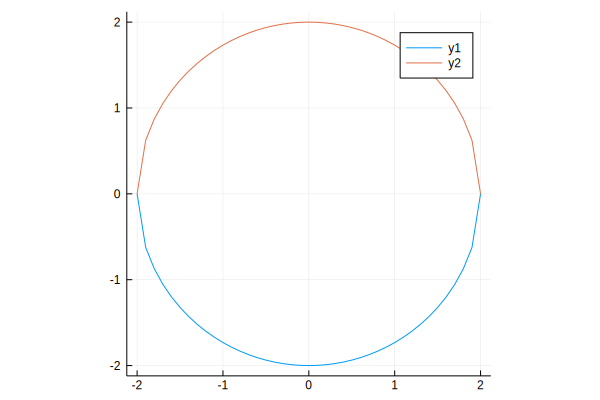

In [21]:
grafica = plot(xx, -yy, ratio=1)
plot!(xx, yy)

In [22]:
savefig(grafica,"circulos.jpg")


## Backends

`Plots.jl` es un paquete que nos permite realizar gráficas en distintos estilos predeterminados, que se denominan **backends**. Hay aunque hay muchos backends, hay algunos que debemos destacar:

1. GR Backend default de Plots. Rápido, simple y elegante, e installado por default con Plots.jl
2. PlotlyJS Backend creado sobre la librería de Javascript [Plotly](https://plot.ly/javascript/line-and-scatter/). Crea gráficas interactivas. Debe de ser installado por su cuenta utilizando Pkg.add("PlotlyJS").
3. PyPlot Backend creado sobre la librería de Python [Matplotlib](https://matplotlib.org/tutorials/introductory/sample_plots.html). Debe de ser installado por su cuenta utilizando Pkg.add("PyPlot").

Para declarar que Backend queremos usar, simplemente debemos de escribir una línea con el nombre del backend en minúsculas y paréntesis al final, como si fuera una función sin argumentos:

In [1]:
using Plots
gr() ## Para usar el backend

Plots.GRBackend()

Ahora veremos como dibujar puntos (o datos). Para esto usaremos `scatter()`. La differencia entre ellas es que `plot` dibuja una línea entre cada par de puntos subsecuentes y `scatter` solo dibuja circulos sobre dichos puntos. Para esto vamos a tomar una ecuación divertida como ejemplo:

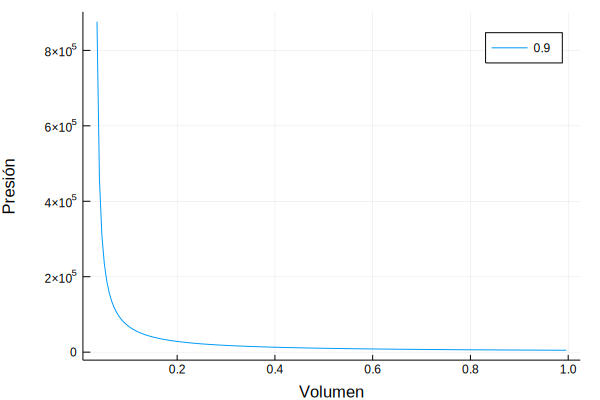

In [24]:

a = 5.467; b = 0.0305; Tc= 647.1; # pc= 220.6; Vc=0.05 #Parámetros experimentales del agua.
R = 8.314
#Ecuación de de van der Waals
frac=(9/10)

p(v) = frac*R*Tc ./ (v .- big(b)) .- a ./ v.^big(2) ## Por qué el big(2)???

### Dominio de la función
vols = [i for i in 0.036:0.005:1]

plot(vols,p(vols),xlabel="Volumen", ylabel="Presión",label="$frac")


Para `scatter`, podemos seleccionar que tipo de figura queremos que se grafique en cada punto utilizando el argumento `marker` o `m`. El argumento puede tomar todos los siguientes valores:

* :circle
* :rect
* :star5
* :diamond
* :hexagon
* :cross
* :xcross
* :utriangle
* :dtriangle
* :rtriangle
* :ltriangle
* :pentagon
* :heptagon
* :octagon
* :star4
* :star6
* :star7
* :star8
* :vline
* :hline

Debemos mencionar que aunque estas son todas las opciones por default de Plots, no todas son compatibles con los Backends. GR si soporta todas las opciones. [Aquí](http://docs.juliaplots.org/latest/supported/) podrás ver que atributos soporta cada backend.

Para modificar el grueso de la línea entre los puntos en plot, hay que usar el argumento adicional `lw` o `linewidth`. Para cambiar el tamaño de las esferas en scatter, utilizamos el argumento `ms` o  `markersize`

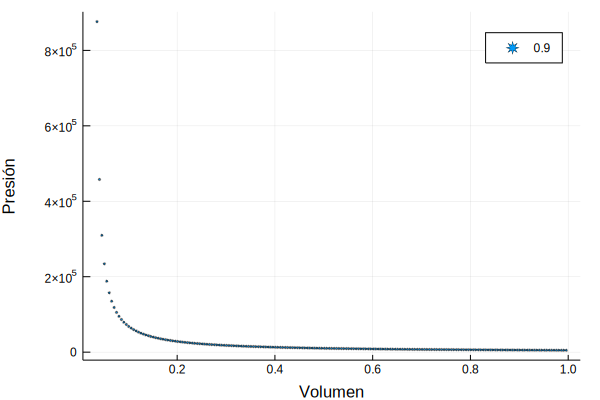

In [25]:
scatter(vols,p(vols),xlabel="Volumen", ylabel="Presión",marker=:star8,ms=1, label="$frac")


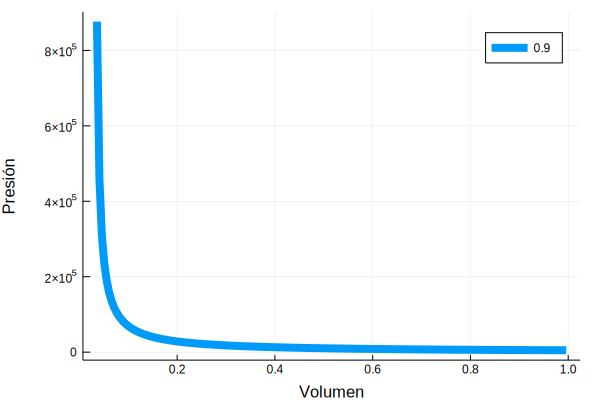

In [26]:
plot(vols,p(vols),xlabel="Volumen",ylabel="Presión",lw=8, label="$frac")


Para plot, podemos añadir una figura sobre los puntos utilizando el argumento `marker` o `m` y las opciones mencionadas previamente, y también cambiar el estilo de línea utilizando el argumento `linestyle` o `ls`. Existen las siguientes opciones:

* :solid
* :dash
* :dot
* :dashdot
* :dashdotdot

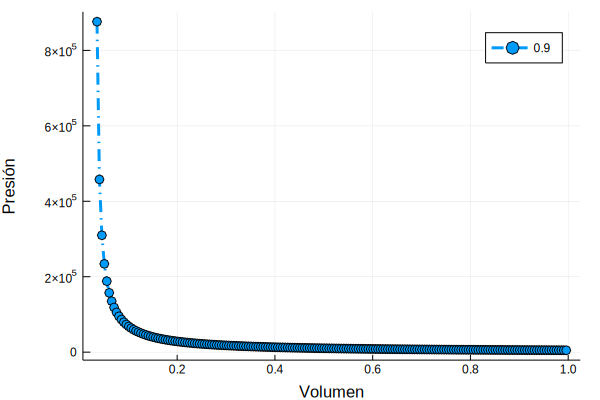

In [28]:
plot(vols,p(vols),xlabel="Volumen",ylabel="Presión",lw=3, ls=:dashdot, m=:octagon, label="$frac")

## Escala de graficación
Podemos cambiar los rangos en que se presentan los ejes coordenados *x * y *y * con `xlim` y `ylim`. La sintaxis es

```julia

xlim=(minimo_x,maximo_x); ylim=(minimo_y,maximo_y)
```

Vamos a quitar los valores negativos de la presión

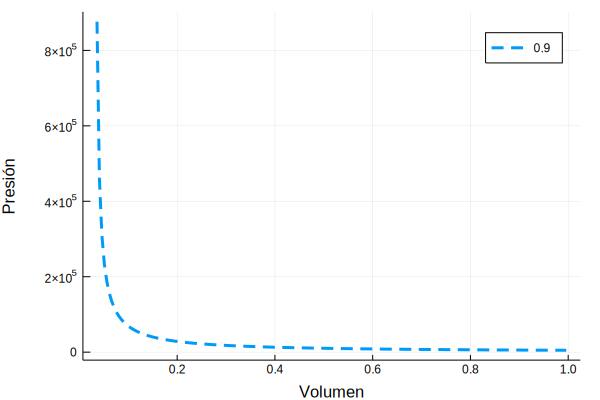

In [29]:
plot(vols, p(vols), xlabel="Volumen", ylabel="Presión", lw=3, ls=:dash, label="$frac",)

También podemos decir si queremos que los ejes de la gráfica sean logarítmicos o no usando los argumentos `xscale=:log10` y `yscale=:log10`.

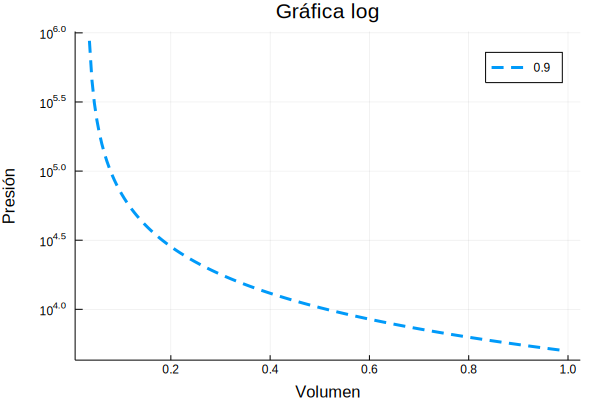

In [30]:
plot(vols, p(vols), xlabel="Volumen", ylabel="Presión", lw=3, ls=:dash, label="$frac", 
    title= "Gráfica log", yscale=:log10)

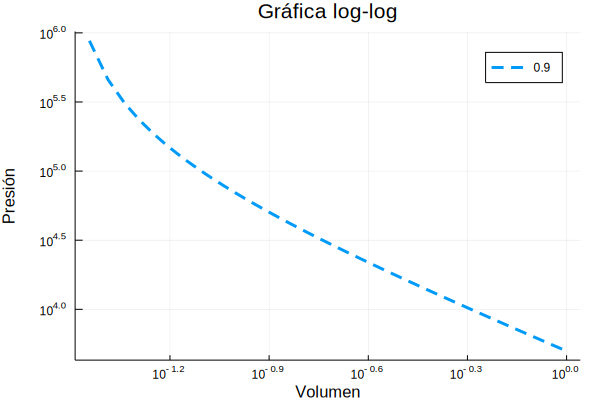

In [87]:
plot(vols, p(vols), xlabel="Volumen", ylabel="Presión", lw=3, ls=:dash, label="$frac", 
    title= "Gráfica log-log", yscale=:log10, xscale=:log10)

# Tiro parabólico

1. Haz una función que calcula la trayectoria de una partícula en tiro parabólico en 2 dimensiones con una posición $(x_0, y_0)$ y velocidad $(v_x, v_y)$ iniciales dadas. Utiliza las fórmulas analíticas conocidas para ello.

$$ y(t) = y_0 + v_y*t-0.5*g*t^2$$

$$x(t) = x_0 +v_x*t$$

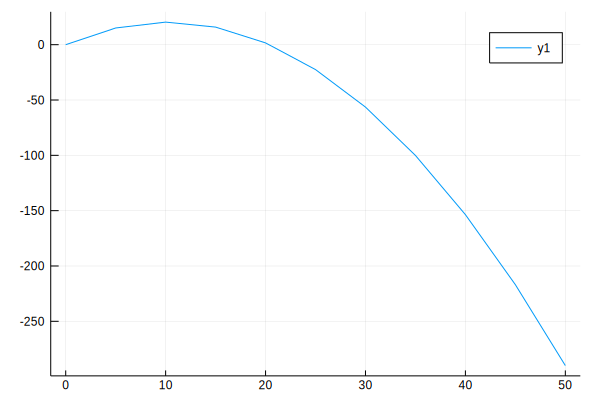

In [32]:
g=9.8
x0, y0 = 0, 0   #\theta = 
vy, vx = 20, 5  ###vcos(\theta), vsin(\theta)
tiempos = [i for i in 0:10]
y(t) = y0 .+ vy*t .- 0.5*g*t.^2
x(t) = x0 .+ vx*t

plot(x(tiempos),y(tiempos))

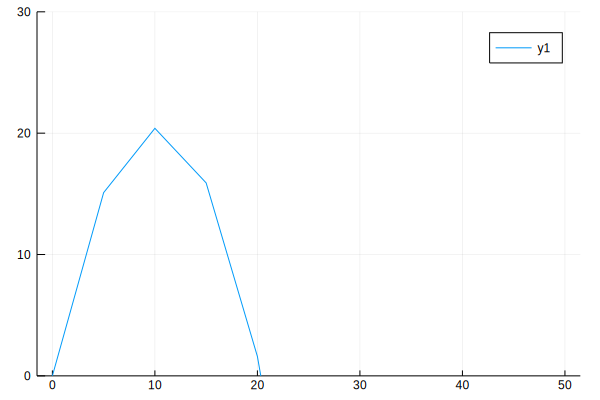

In [34]:
ylims!(0,30)

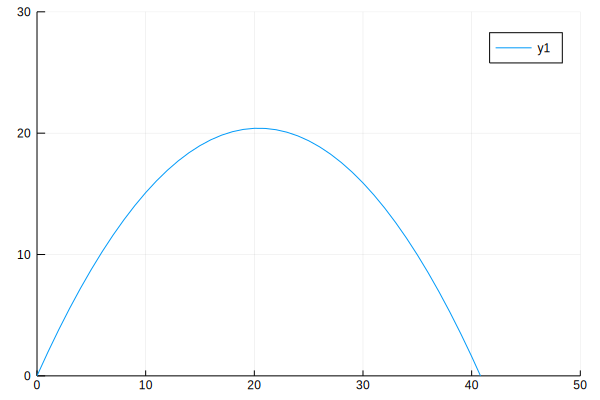

In [39]:
vx = 10
tiempos = [ i for i in 0:0.1:10]
plot(x(tiempos),y(tiempos),ylims=(0,30),xlims=(0,50))

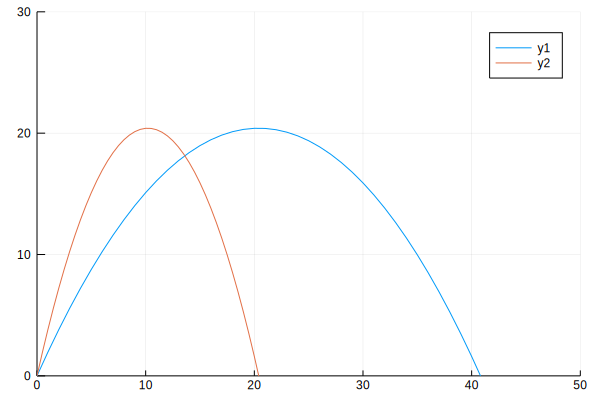

In [40]:
vx = 5
plot!(x(tiempos),y(tiempos))

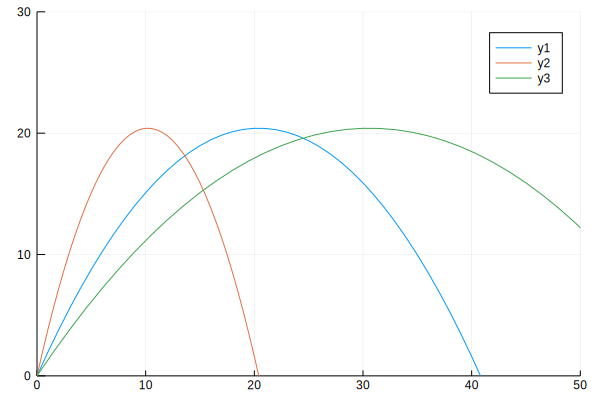

In [41]:
vx = 15
plot!(x(tiempos),y(tiempos))

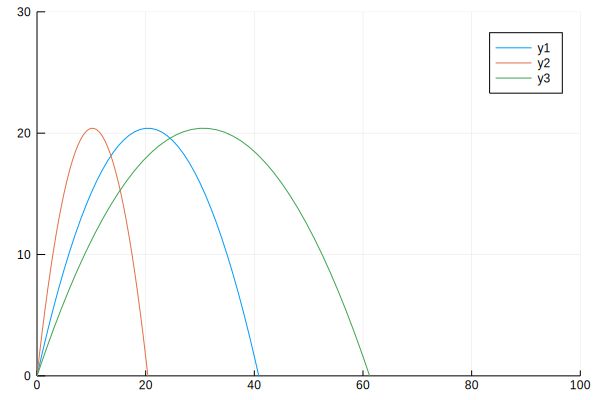

In [43]:
xlims!(0,100)

2. Haz otra función con el mismo nombre que acepta sólo tres argumentos: $x_0$, $y_0$ y el ángulo inicial $\theta$. Puedes suponer una rapidez de $v=20$.

$$ x(t) = x_0 +v\cos(\theta)*t$$

In [44]:
tiempos

101-element Array{Float64,1}:
  0.0
  0.1
  0.2
  0.3
  0.4
  0.5
  0.6
  0.7
  0.8
  0.9
  1.0
  1.1
  1.2
  ⋮  
  8.9
  9.0
  9.1
  9.2
  9.3
  9.4
  9.5
  9.6
  9.7
  9.8
  9.9
 10.0

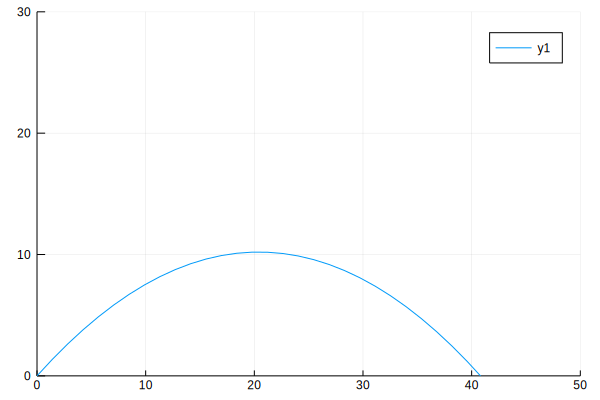

In [49]:
θ = pi/4   ### \theta = 45
v = 20
vy , vx = v*sin(θ), v*cos(θ)
### x(t) = x0+vx*t
plot(x(tiempos),y(tiempos),xlims=(0,50),ylims=(0,30))

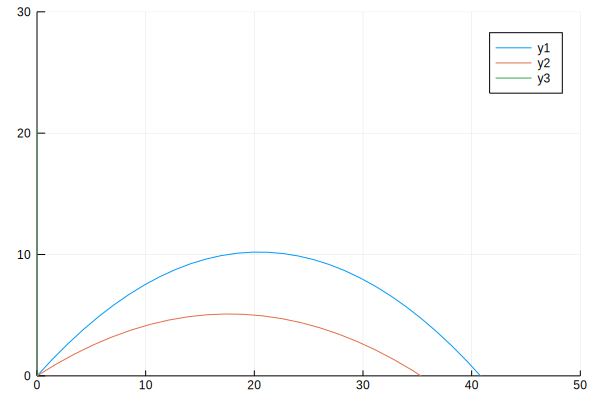

In [50]:
θ = pi/6
vy , vx = v*sin(θ), v*cos(θ)
plot!(x(tiempos),y(tiempos),label="")

θ = pi/2
vy , vx = v*sin(θ), v*cos(θ)
plot!(x(tiempos),y(tiempos))

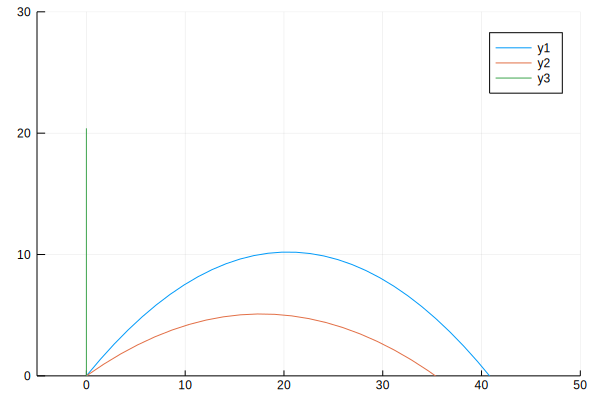

In [53]:
xlims!(-5,50)

3. Grafica distintas trayectorias con la misma posición pero distintos ángulos iniciales. Arregla tu gráfica para que sólo muestra la parte hasta que la partícula caiga al suelo.

4. Comprueba gráficamente para cuál ángulo se tiene el máximo alcance.

# Calculando $\pi$


También podemos hacer cálculos útiles, por ejemplo podemos calcular el valor de $\pi$. Hay literalmente miles de maneras de hacer esto. Una de ellas (muy lejos de ser la mejor) es a través de la siguiente fórmula:

$$\sum_{n=1}^\infty \frac{1}{n^2} = \frac{\pi^2}{6}.$$

$$\pi =\sqrt{6\sum_{n=1}^N \frac{1}{n^2}} $$

1. Fija una $N$ y calcula $\pi$ utilizando una suma hasta $N$. Haz de esto una función que se llama mi_π.

In [7]:
function mi_pi(N)
    suma = 0
    for i in 1:N
        suma += 6/i^2
    end
    return sqrt(suma)
end



mi_pi (generic function with 1 method)

In [9]:
p=mi_pi(10)

3.04936163598207

In [13]:
mi_pi(1e6)

3.141591698660415

2. Ahora repite el cálculo para valores diferentes de $N$ y almacénalos, utilizando únicamente lo que hemos visto en este notebook.

In [14]:
?push!

search: push! pushfirst! pushdisplay



```
push!(collection, items...) -> collection
```

Insert one or more `items` at the end of `collection`.

# Examples

```jldoctest
julia> push!([1, 2, 3], 4, 5, 6)
6-element Array{Int64,1}:
 1
 2
 3
 4
 5
 6
```

Use [`append!`](@ref) to add all the elements of another collection to `collection`. The result of the preceding example is equivalent to `append!([1, 2, 3], [4, 5, 6])`.


In [27]:
resultados=[]
for N in 1:1e6:1e7
    push!(resultados,mi_pi(N))
end

In [28]:
length(resultados)

10

3. Grafica el resultado para los distintos valores de $N$, como función de $N$. ¿Qué observas? ¿Qué puedes agregar a tu gráfica para mostralo?

In [20]:
using Plots
gr()

Plots.GRBackend()

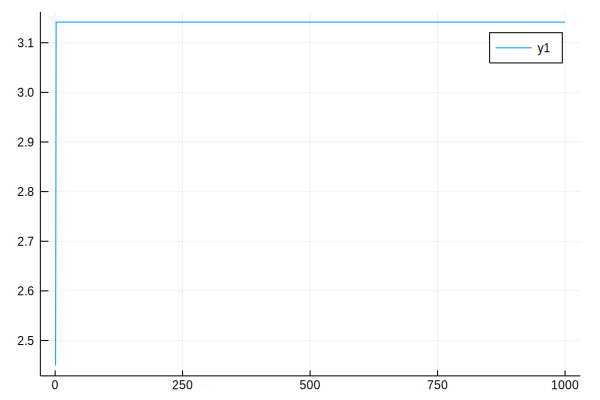

In [21]:
plot(resultados)

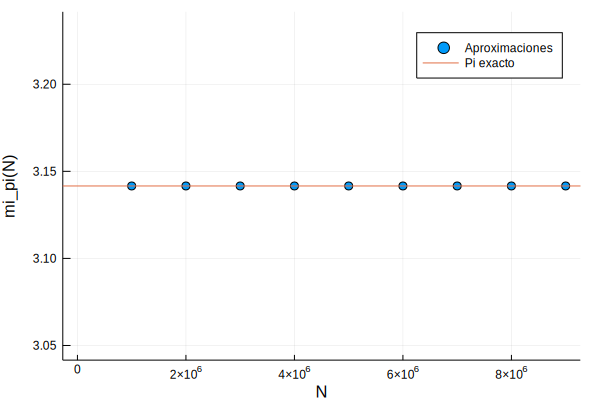

In [39]:
δ=0.1
scatter(1:1e6:1e7,resultados,ylims=(pi-δ,pi+δ),label="Aproximaciones",xlabel="N",ylabel="mi_pi(N)")
hline!([pi],label="Pi exacto")


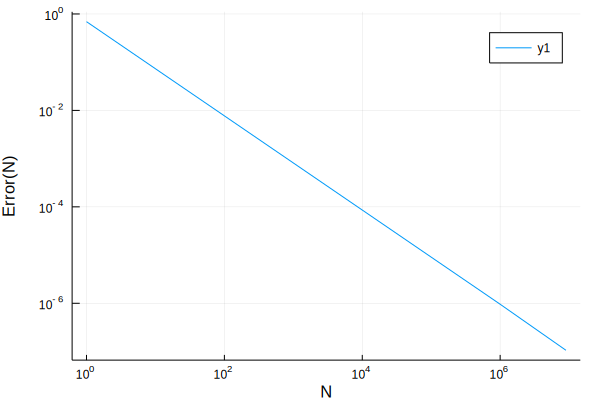

In [53]:
plot(1:1e6:1e7,pi .- resultados,ylabel="Error(N)",xlabel="N",yscale=:log10,xscale=:log10)

La línea recta en la gráfica log-log nos indica que nuestro error disminuye como un polinomio $\propto N^k$

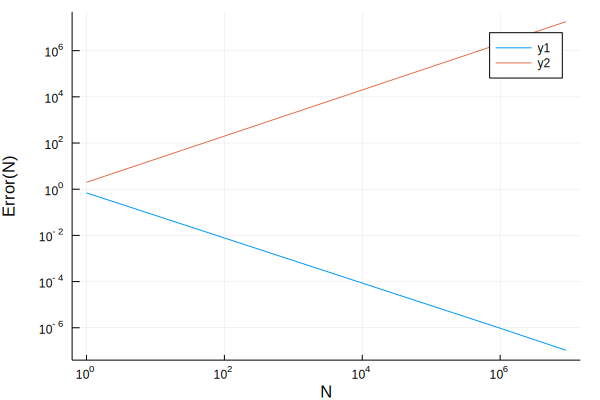

In [54]:
plot!(1:1e6:1e7,[2i for i in 1:1e6:1e7])

La pendiente de estas rectas son 2 y -2. 

4. ¿Cómo podrías ver qué tan rápidamente converge la suma cuando $N \to \infty$? Hazlo.

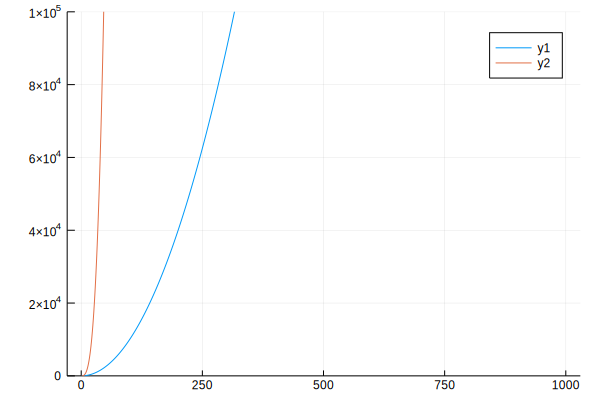

In [60]:
xes=[i for i in 1:1e3]
yes2 = xes.^2
yes3 = xes.^3

plot(xes,yes2,ylims=(0,1e5))
plot!(xes,yes3)

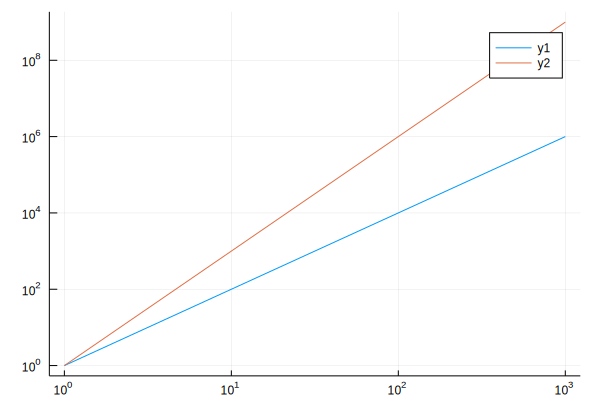

In [62]:
plot(xes,yes2,xscale=:log10,yscale=:log10)
plot!(xes,yes3)

In [63]:
?grid

search: grid ygrid! xgrid! adapted_grid cgradients showgradient showgradient!



```
grid(args...; kw...)
```

Create a grid layout for subplots. `args` specify the dimensions, e.g. `grid(3,2, widths = (0.6,04))` creates a grid with three rows and two columns of different width.


In [21]:
suma_gauss(n) =n*(n+1)/2 

suma_gauss (generic function with 1 method)

In [38]:
naturales = [i for i in 1:10]

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [40]:
n=10
resultado = 0

for i in 1:n
    resultado += naturales[i]
end

println(resultado)
resultado == suma_gauss(n)

55


true

In [41]:
cuadrados

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [43]:
n=100
resultado = 0
cuadrados=[i^2 for i in 1:n]
for i in 1:length(cuadrados)
    resultado += cuadrados[i]
end

println(resultado)


338350


In [44]:
suma_cuadrados(n)=n*(n+1)*(2*n+1)/6
suma_cuadrados(100)

338350.0